In [2]:
import cv2
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import pathlib
import os
import matplotlib.pyplot as plt

OUTPUT_PATH = 'dft_output/'
img_path = 'dft_sumple/asuka.jpg'
sumple_img = Image.open(img_path)
width, height = sumple_img.size
width = int(width)
height = int(height)
# sumple_img = sumple_img.resize((width, height), Image.LANCZOS)
root, format = os.path.splitext(img_path)
pathlib.Path(f'{OUTPUT_PATH}/{root}/freq').mkdir(exist_ok=True, parents=True)
pathlib.Path(f'{OUTPUT_PATH}/{root}/sum').mkdir(exist_ok=True, parents=True)
arr = np.fft.fftn(sumple_img)
# sumple_img = sumple_img.convert('L')

2次元DFFT
周波数別に画像を保存し，GIFを作成する

In [13]:
canvas = np.zeros(shape=(height, width, 3))
imgs = []
base = np.zeros(shape=(height, width, 3))

partition = 256
lim = height if height > width else width
step = int(width / partition)
for n in range(0, lim, step):
    print(f'{n} / {lim}')
    current_mask = np.zeros(shape=(height, width, 3))
    current_mask[n: n + step] = 1
    current_mask[:, n:n + step] = 1
    base[n: n + step] = current_mask[n:n + step]
    base[:, n:n + step] = current_mask[:, n:n + step]
    # base_ifft = np.fft.fft2(base)
    # current_maskによるフィルタリング
    filted_by_mask = arr * current_mask
    iimg_mask = np.fft.ifftn(filted_by_mask)
    nd_img = np.uint8(iimg_mask.real)
    pil_img = Image.fromarray(nd_img)
    font = ImageFont.truetype("arial.ttf", 32)
    draw = ImageDraw.Draw(pil_img)# im上のImageDrawインスタンスを作る
    draw.text((0,0),f'{n + step} / {lim}', font=font)
    pil_img.save(f'{OUTPUT_PATH}/{root}/freq/img_{n}.jpg')
    
    # baseによってフィルタリングした画像の逆変換
    filted_by_base = arr * base
    iimg_base = np.fft.ifftn(filted_by_base)
    nd_img = np.uint8(iimg_base.real)
    pil_img = Image.fromarray(nd_img)
    draw = ImageDraw.Draw(pil_img)# im上のImageDrawインスタンスを作る
    draw.text((0,0),f'{n + step} / {lim}', font=font)
    imgs.append(pil_img)
    pil_img.save(f'{OUTPUT_PATH}/{root}/sum/img_{n}.jpg')
        
pil_img.show()
imgs[0].save(f'{OUTPUT_PATH}/{root}/output.gif', save_all=True, append_images=imgs)

0 / 1280
5 / 1280
10 / 1280
15 / 1280
20 / 1280
25 / 1280
30 / 1280
35 / 1280
40 / 1280
45 / 1280
50 / 1280
55 / 1280
60 / 1280
65 / 1280
70 / 1280
75 / 1280
80 / 1280
85 / 1280
90 / 1280
95 / 1280
100 / 1280
105 / 1280
110 / 1280
115 / 1280
120 / 1280
125 / 1280
130 / 1280
135 / 1280
140 / 1280
145 / 1280
150 / 1280
155 / 1280
160 / 1280
165 / 1280
170 / 1280
175 / 1280
180 / 1280
185 / 1280
190 / 1280
195 / 1280
200 / 1280
205 / 1280
210 / 1280
215 / 1280
220 / 1280
225 / 1280
230 / 1280
235 / 1280
240 / 1280
245 / 1280
250 / 1280
255 / 1280
260 / 1280
265 / 1280
270 / 1280
275 / 1280
280 / 1280
285 / 1280
290 / 1280
295 / 1280
300 / 1280
305 / 1280
310 / 1280
315 / 1280
320 / 1280
325 / 1280
330 / 1280
335 / 1280
340 / 1280
345 / 1280
350 / 1280
355 / 1280
360 / 1280
365 / 1280
370 / 1280
375 / 1280
380 / 1280
385 / 1280
390 / 1280
395 / 1280
400 / 1280
405 / 1280
410 / 1280
415 / 1280
420 / 1280
425 / 1280
430 / 1280
435 / 1280
440 / 1280
445 / 1280
450 / 1280
455 / 1280
460 / 1280

FFTの周波数別の振幅をグラフにする  
離散フーリエ変換において，座標が周波数として扱われる

C:\Users\exgon\Anaconda3\envs\py364\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


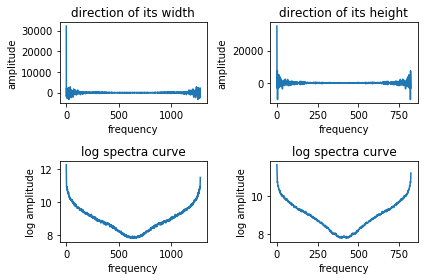

In [14]:
fig = plt.figure()
width_ax = fig.add_subplot(221)
height_ax = fig.add_subplot(222)
log_width_ax = fig.add_subplot(223)
log_height_ax = fig.add_subplot(224)
# total_ax = fig.add_subplot(223)
# 輝度の各属性間は考慮しないので，RGBの平均を各画素について算出する
flattened_arr = np.mean(arr.real, axis=2)

# width方向について
freq = np.arange(0, width, 1)
amp = np.mean(flattened_arr, axis=0)
width_ax.plot(freq, amp)
width_ax.set_title('direction of its width')
width_ax.set_xlabel('frequency')
width_ax.set_ylabel('amplitude')

# height方向について
freq = np.arange(0, height, 1)
amp = np.mean(flattened_arr, axis=1)
height_ax.plot(freq, amp)
height_ax.set_title('direction of its height')
height_ax.set_xlabel('frequency')
height_ax.set_ylabel('amplitude')

# 両方の方向について同時に考慮してみる
# lim = height if height > width else width
# amp = [np.mean(arr[n: n + 1, n: n + 1]) for n in range(lim)]
# total_ax.plot(freq, amp)
# total_ax.set_title('both direction')
# total_ax.set_xlabel('frequency')
# total_ax.set_ylabel('amplitude')

# Log spectra
# width方向について
freq = np.arange(0, width, 1)
amp = np.mean(np.abs(flattened_arr), axis=0)
log_amp = np.log(amp)
log_width_ax.plot(freq, log_amp)
log_width_ax.set_title('log spectra curve')
log_width_ax.set_xlabel('frequency')
log_width_ax.set_ylabel('log amplitude')

# height方向について
freq = np.arange(0, height, 1)
amp = np.mean(np.abs(flattened_arr), axis=1)
log_amp = np.log(amp)
log_height_ax.plot(freq, log_amp)
log_height_ax.set_title('log spectra curve')
log_height_ax.set_xlabel('frequency')
log_height_ax.set_ylabel('log amplitude')

fig.tight_layout()
fig.show()
fig.savefig(f'{OUTPUT_PATH}/{root}/fourier_analysis.jpg')

In [4]:
# np.min(base)
img_path = 'sumple_img/Aerial.bmp'
save_path = 'resized/Resized_Aerial.bmp'
img = cv2.imread(img_path)
resized = cv2.resize(img, (64, 64))
cv2.imwrite(save_path, resized)

True